In [88]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal

data = pd.read_csv('Staphylococcus_aureus_Infection_Data.csv')

In [90]:
df = data.dropna()

target  = df.iloc[:, 7]
target = target.astype('int')
feature = df.iloc[:, df.columns != {'ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'}]
feature.drop(columns=['ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'], inplace=True)

z = 0
for i in range(5547):
    if( type(feature.iloc[i,1]) != type(float(0))):
        z = feature.iloc[i,1][:2]
        feature.iloc[i,1] = int(z)
        if(feature.iloc[i,1] == 0):
            feature.iloc[i,1] = 1
    else:
        feature.iloc[i,1] = 1
feature=feature.astype('int')

In [91]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = len(np.unique(y_train))

input_shape = 2096

model = tf.keras.models.Sequential([
   tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.1)),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
111/111 [==============================] - 1s 2ms/step - loss: 25.1421 - accuracy: 0.5579 - val_loss: 2.7989 - val_accuracy: 0.3311
Epoch 2/10
111/111 [==============================] - 0s 1ms/step - loss: 3.8705 - accuracy: 0.5669 - val_loss: 1.1239 - val_accuracy: 0.4336
Epoch 3/10
111/111 [==============================] - 0s 2ms/step - loss: 1.8402 - accuracy: 0.6140 - val_loss: 0.7022 - val_accuracy: 0.6486
Epoch 4/10
111/111 [==============================] - 0s 2ms/step - loss: 2.9862 - accuracy: 0.6058 - val_loss: 3.5002 - val_accuracy: 0.3694
Epoch 5/10
111/111 [==============================] - 0s 2ms/step - loss: 2.0042 - accuracy: 0.6289 - val_loss: 3.0673 - val_accuracy: 0.6757
Epoch 6/10
111/111 [==============================] - 0s 2ms/step - loss: 1.9076 - accuracy: 0.6374 - val_loss: 2.3898 - val_accuracy: 0.6723
Epoch 7/10
111/111 [==============================] - 0s 1ms/step - loss: 1.4356 - accuracy: 0.6692 - val_loss: 1.3630 - val_accuracy: 0.6745
Epoch

In [92]:
test_loss, test_acc = model.evaluate(x_test, y_test)


35/35 [==============================] - 0s 910us/step - loss: 1.1145 - accuracy: 0.7171


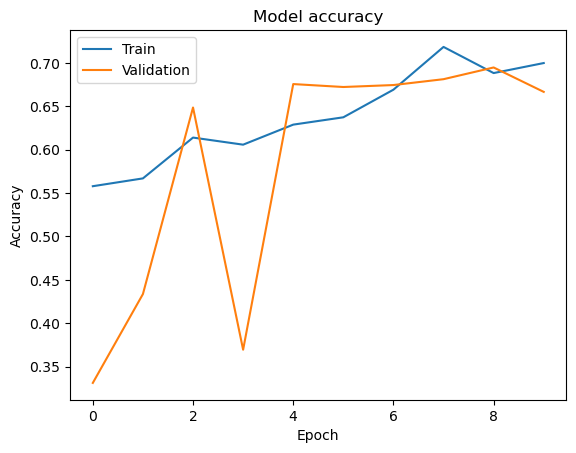

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

35/35 [==============================] - 0s 813us/step


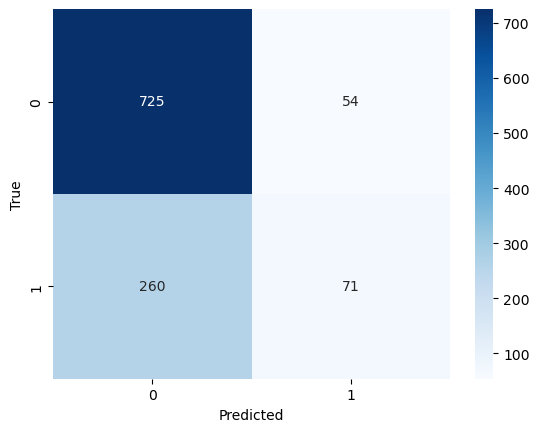

In [94]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [97]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training accuracy: {accuracy}")

Training accuracy: 0.7277439832687378
